Accuracy: 0.8367346938775511

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.55       294
weighted avg       0.79      0.84      0.80       294



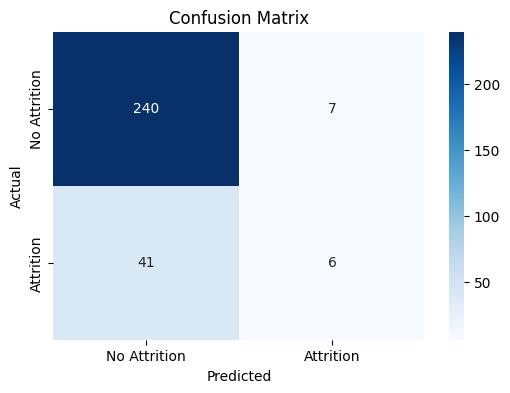

<ipython-input-3-9febb5f933e1>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette='viridis')


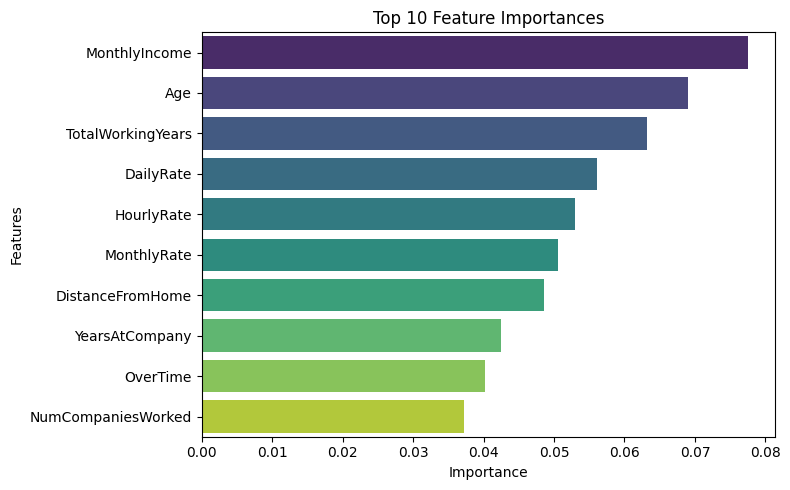

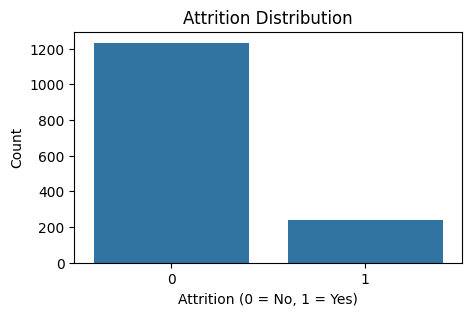

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Load dataset from CSV file
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

# Drop columns that don't provide useful information or are constant
df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis=1, inplace=True)

# Convert categorical columns to numeric labels for modeling
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features (X) and target variable (y)
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Split data into training and test sets with 80-20 ratio; stratify to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest classifier with 200 trees
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print model accuracy and detailed classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot 1: Confusion matrix heatmap for prediction results
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot 2: Top 10 most important features according to the trained model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort descending

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Plot 3: Distribution of target variable (Attrition) in the dataset
plt.figure(figsize=(5,3))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()